<a href="https://colab.research.google.com/github/DerekLeeCS/FreqML/blob/master/Derek_Lee_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

---



In [ ]:
# California Housing Dataset from Google Colab sample_data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data
trainData = pd.read_csv("sample_data/california_housing_train.csv") 
testData = pd.read_csv("sample_data/california_housing_test.csv") 

originalData = pd.concat([trainData,testData])              # Merges data into a single DataFrame
train, test = train_test_split(originalData, test_size=0.2) # Splits into 80-20
valid, test = train_test_split(test, test_size=0.5)         # Finishes split into 80-10-10


# Separate into input and output
xTrain,yTrain = train.iloc[:,:-1],train.iloc[:,-1]
xValid,yValid = valid.iloc[:,:-1],valid.iloc[:,-1]
xTest,yTest = test.iloc[:,:-1],test.iloc[:,-1]

# Modules

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Random Forest

---

Trying the textbook's approach to this dataset (max_samples = 2 or 6) gives a terrible result. Changing the ccp_alpha parameter also gives a terrible result, and sets all feature importances to 0.
<br><br>
I started using Average Absolute Error because the textbook used the same metric.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Error: 0.33324233967327027
Baseline Error: 0.6264809287990469


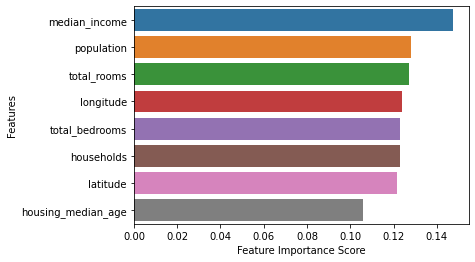

In [ ]:
def avgAbsError(yReal,yPred):
    n = len(yReal)
    error = 0
    for i in range(0,n):
        error += abs(yReal[i] - yPred[i])/yReal[i]
    error /= n
    return error


def main():
    # Random Forest
    clf = RandomForestClassifier(n_estimators=10,oob_score=True)
    clf.fit(xTrain,yTrain)
    yPred=clf.predict(xTest)
    error = avgAbsError(yTest.to_numpy(),yPred)
    print("Error: ", end="")
    print(error)

    # Baseline Error
    yAvg = yTrain.mean()
    yAvg = np.full(yTest.size,yAvg)     # Creates numpy array to calculate MSE
    baseError = avgAbsError(yTest.to_numpy(),yAvg)
    print("Baseline Error: ", end="")
    print(baseError)

    # Plotting    
    plt.figure()
    feature_imp = pd.Series( clf.feature_importances_,index=list(xTest.columns) ).sort_values(ascending=False)
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')  
    

main()